In [46]:
'''
回帰なら最小二乗回帰(OLS)   #regression
分類ならロジスティック回帰  #classification
クラスタリングならK-means #clustering

が第一選択。それぞれで対応できなければ随時選択肢を増やしていく。by @TJO_datasci
https://pythondatascience.plavox.info/scikit-learn/%E7%B7%9A%E5%BD%A2%E5%9B%9E%E5%B8%B0

https://pythondatascience.plavox.info/このサイトに基本はだいたい載っている。
'''

'\n回帰なら最小二乗回帰(OLS)   #regression\n分類ならロジスティック回帰  #classification\nクラスタリングならK-means #clustering\n\nが第一選択。それぞれで対応できなければ随時選択肢を増やしていく。by @TJO_datasci\nhttps://pythondatascience.plavox.info/scikit-learn/%E7%B7%9A%E5%BD%A2%E5%9B%9E%E5%B8%B0\n'

In [47]:
#重回帰分析

In [48]:
import pandas as pd
import numpy as np
wine = pd.read_csv("./input/regression_winequality-red.csv", sep=";")
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [49]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [50]:
#まずは単回帰分析
# sklearn.linear_model.LinearRegression クラスを読み込み
from sklearn import linear_model
clf = linear_model.LinearRegression()
 
# 説明変数に "density (濃度)" を利用
X = wine.loc[:, ['density']].as_matrix()
 
# 目的変数に "alcohol (アルコール度数)" を利用
Y = wine['alcohol'].as_matrix()
 
# 予測モデルを作成
clf.fit(X, Y)
 
# # 回帰係数
# print(clf.coef_)
 
# # 切片 (誤差)
# print(clf.intercept_)
 
# # 決定係数
# print(clf.score(X, Y))

print("[alcohol] = " + str(clf.coef_) + " * [density] + " +str(clf.intercept_))
print("決定係数: " + str(clf.score(X, Y)))

[alcohol] = [-280.16382307] * [density] + 289.675343383
決定係数: 0.246194364397


/Users/masaki/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/ipykernel/__main__.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/Users/masaki/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/ipykernel/__main__.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


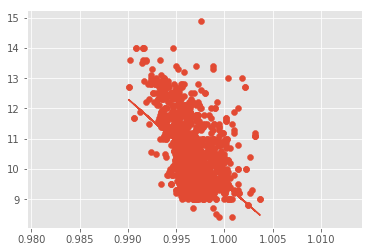

In [51]:
# matplotlib パッケージを読み込み
import matplotlib.pyplot as plt
%matplotlib inline

# 散布図
plt.scatter(X, Y)
 
# 回帰直線
plt.plot(X, clf.predict(X))

In [52]:
#重回帰分析
from sklearn import linear_model
clf = linear_model.LinearRegression()
 
# 説明変数に "quality (品質スコア以外すべて)" を利用
wine_except_quality = wine.drop("quality", axis=1)
X = wine_except_quality.as_matrix()
 
# 目的変数に "quality (品質スコア)" を利用
Y = wine['quality'].as_matrix()
 
# 予測モデルを作成
clf.fit(X, Y)
 
# 偏回帰係数
print(pd.DataFrame({"Name":wine_except_quality.columns,
                    "Coefficients":clf.coef_}).sort_values(by='Coefficients') )
 
# 切片 (誤差)
print(clf.intercept_)

print("決定係数: " + str(clf.score(X, Y)))

    Coefficients                  Name
7     -17.881164               density
4      -1.874225             chlorides
1      -1.083590      volatile acidity
8      -0.413653                    pH
2      -0.182564           citric acid
6      -0.003265  total sulfur dioxide
5       0.004361   free sulfur dioxide
3       0.016331        residual sugar
0       0.024991         fixed acidity
10      0.276198               alcohol
9       0.916334             sulphates
21.9652084495
決定係数: 0.360551703039


/Users/masaki/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/ipykernel/__main__.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/Users/masaki/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/ipykernel/__main__.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [53]:
#正規化して重回帰分析
from sklearn import linear_model
clf = linear_model.LinearRegression()
 
# データフレームの各列を正規化
wine2 = wine.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))
wine2.head()
 
# 説明変数に "quality (品質スコア以外すべて)" を利用
wine2_except_quality = wine2.drop("quality", axis=1)
X = wine2_except_quality.as_matrix()
 
# 目的変数に "quality (品質スコア)" を利用
Y = wine2['quality'].as_matrix()
 
# 予測モデルを作成
clf.fit(X, Y)
 
# 偏回帰係数
print(pd.DataFrame({"Name":wine2_except_quality.columns,
                    "Coefficients":np.abs(clf.coef_)}).sort_values(by='Coefficients') )
 
# 切片 (誤差)
print(clf.intercept_)

print("決定係数: " + str(clf.score(X, Y)))

    Coefficients                  Name
2       0.036513           citric acid
3       0.047687        residual sugar
7       0.048708               density
0       0.056479         fixed acidity
5       0.061931   free sulfur dioxide
8       0.105068                    pH
6       0.184775  total sulfur dioxide
4       0.224532             chlorides
9       0.306056             sulphates
1       0.316408      volatile acidity
10      0.359057               alcohol
1.27015586565e-15
決定係数: 0.360551703039


/Users/masaki/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/ipykernel/__main__.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/Users/masaki/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/ipykernel/__main__.py:14: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [54]:
#ロジスティック回帰??

In [55]:
#https://qiita.com/hik0107/items/9b6e1e989f4eaefdc31d
#http://ailaby.com/logistic_reg/

In [80]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.externals import joblib

def main():
    # 学習用のデータを読み込み
    data = pd.read_csv("./input/classification_train.csv", sep=",") #if x1+x2>=1: x3=1, else: x3=0

    # 説明変数：x1, x2
    X = data.loc[:, ['x1', 'x2']].as_matrix()

    # 目的変数：x3
    y = data['x3'].as_matrix()

    # 学習（ロジスティック回帰）
    clf = linear_model.LogisticRegression(random_state=0)
    clf.fit(X, y)

    # ロジスティック回帰の学習結果
    a = clf.coef_
    b = clf.intercept_  
    print("回帰係数:", a)
    print("切片:", b) 
    print("決定係数:", clf.score(X, y))

    # テスト用データの読み込み
    data = pd.read_csv("./input/classification_test.csv", sep=",")

    # 学習結果の検証（テスト用データx1, x2を入力）
    X_test = data.loc[:, ['x1', 'x2']].as_matrix()
    y_predict = clf.predict(X_test)

    # 検証結果の表示
    print("検証結果：", y_predict)
    
    # 学習結果を出力
    print(joblib.dump(clf, 'train.learn'))
    
    
    
    
    # trainとtest用データ用意
    X_train, X_test, Y_train, Y_test = train_test_split(X, y)

    log_model2 = linear_model.LogisticRegression() 
    log_model2.fit(X_train, Y_train)           # trainデータでモデル作成
    class_predict = log_model2.predict(X_test) # testデータを予測
    
    from sklearn import metrics # 予測精度確認用
    print(metrics.accuracy_score(Y_test, class_predict)) # 精度確認
    

if __name__ == "__main__":
    main()

回帰係数: [[ 0.04173437  0.38078122]]
切片: [-1.76161523]
決定係数: 0.818181818182
検証結果： [0 1 1 0]
['train.learn']
0.666666666667


/Users/masaki/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/ipykernel/__main__.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/Users/masaki/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/ipykernel/__main__.py:15: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/Users/masaki/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/ipykernel/__main__.py:32: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [81]:
#k-means

In [82]:
#https://pythondatascience.plavox.info/scikit-learn/%E3%82%AF%E3%83%A9%E3%82%B9%E3%82%BF%E5%88%86%E6%9E%90-k-means

In [88]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
 
# データセットを読み込み
cust_df = pd.read_csv("http://pythondatascience.plavox.info/wp-content/uploads/2016/05/Wholesale_customers_data.csv")
 
# 不要なカラムを削除
del(cust_df['Channel'])
del(cust_df['Region'])
cust_df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [90]:
# Pandas のデータフレームから Numpy の行列 (Array) に変換
cust_array = np.array([cust_df['Fresh'].tolist(),
                       cust_df['Milk'].tolist(),
                       cust_df['Grocery'].tolist(),
                       cust_df['Frozen'].tolist(),
                       cust_df['Milk'].tolist(),
                       cust_df['Detergents_Paper'].tolist(),
                       cust_df['Delicassen'].tolist()
                       ], np.int32)

# 行列を転置
cust_array = cust_array.T
 
# クラスタ分析を実行 (クラスタ数=4)
pred = KMeans(n_clusters=4).fit_predict(cust_array)
pred

array([2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 0, 0, 0, 2, 1, 2, 2, 2, 2, 2, 0,
       3, 0, 2, 2, 2, 1, 0, 2, 2, 2, 0, 2, 2, 0, 1, 1, 0, 0, 2, 1, 1, 2, 1,
       1, 3, 2, 1, 2, 2, 0, 1, 0, 2, 1, 1, 2, 2, 2, 3, 2, 1, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 3, 3, 0, 2, 0, 2, 2,
       1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 0, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2,
       2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 0, 2, 2, 2, 2, 3, 1, 3,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 1, 1, 0, 2, 2, 1, 2,
       2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2,
       0, 1, 0, 2, 2, 0, 0, 2, 2, 0, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 0, 2, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2,

In [92]:
#Kmeans完了。それぞれの特徴を確認。

# Pandas のデータフレームにクラスタ番号を追加
cust_df['cluster_id']=pred
cust_df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster_id
0,12669,9656,7561,214,2674,1338,2
1,7057,9810,9568,1762,3293,1776,2
2,6353,8808,7684,2405,3516,7844,2
3,13265,1196,4221,6404,507,1788,2
4,22615,5410,7198,3915,1777,5185,0


In [93]:
# 各クラスタに属するサンプル数の分布
cust_df['cluster_id'].value_counts()

2    291
1     79
0     63
3      7
Name: cluster_id, dtype: int64

In [98]:
# 各クラスタの各部門商品の購買額の平均値
for i in range(4):
    print("クラスタ番号: " + str(i))
    cust_mean=cust_df[cust_df['cluster_id']==i].mean() # クラスタ番号 = i
    print(cust_mean)

クラスタ番号: 0
Fresh               33611.269841
Milk                 4874.396825
Grocery              5852.968254
Frozen               5729.285714
Detergents_Paper     1056.730159
Delicassen           2119.587302
cluster_id              0.000000
dtype: float64
クラスタ番号: 1
Fresh                4899.607595
Milk                12689.063291
Grocery             19743.240506
Frozen               1653.481013
Detergents_Paper     8947.278481
Delicassen           1718.000000
cluster_id              1.000000
dtype: float64
クラスタ番号: 2
Fresh               8524.848797
Milk                3156.395189
Grocery             4363.261168
Frozen              2709.958763
Detergents_Paper    1282.319588
Delicassen          1087.085911
cluster_id             2.000000
dtype: float64
クラスタ番号: 3
Fresh               42117.285714
Milk                46046.142857
Grocery             42914.285714
Frozen              10211.714286
Detergents_Paper    17327.571429
Delicassen          12192.142857
cluster_id              3.00000

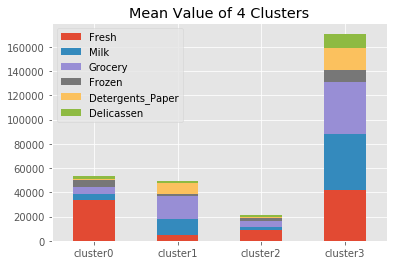

In [99]:
# 可視化（積み上げ棒グラフ）
import matplotlib.pyplot as plt
 
clusterinfo = pd.DataFrame()
for i in range(4):
    clusterinfo['cluster' + str(i)] = cust_df[cust_df['cluster_id'] == i].mean()
clusterinfo = clusterinfo.drop('cluster_id')
 
my_plot = clusterinfo.T.plot(kind='bar', stacked=True, title="Mean Value of 4 Clusters")
my_plot.set_xticklabels(my_plot.xaxis.get_majorticklabels(), rotation=0)